In [59]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Getting the data 1
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
dataset_path = '../datasets/'
response = requests.get(url)
with open(f'{dataset_path}laptops.csv', 'wb') as file:
    for chunk in response.iter_content(chunk_size=1024):
        file.write(chunk)

In [61]:
# Getting the data 2
laptops = pd.read_csv(f'{dataset_path}laptops.csv')
laptops.columns = laptops.columns.str.lower().str.replace(' ', '_')

In [62]:
df = laptops[['ram', 'storage', 'screen', 'final_price']]

In [63]:
# Question 1
# There's one column with missing values. What is it?
missing_values = df.isnull().any()
print(missing_values)

ram            False
storage        False
screen          True
final_price    False
dtype: bool


In [64]:
# Question 2
# What's the median (50% percentile) for variable 'ram'?
median_value = laptops['ram'].median()
print(median_value)

16.0


In [93]:
# Prepare and split the dataset
# Shuffle the dataset (the filtered one you created above), use seed 42.
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
# Use the same code as in the lectures
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n_train, n_val, n_test)

1296 432 432


In [94]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [95]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [96]:
# Question 3
# We need to deal with missing values for the column from Q1.
# We have two options: fill it with 0 or with the mean of this variable.
# Try both options. For each, train a linear regression model without regularization using the code from the lessons.
# For computing the mean, use the training only!
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
# Round the RMSE scores to 2 decimal digits using round(score, 2)
# Which option gives better RMSE?
# Options:
# 
# With 0
# With mean
# Both are equally good

In [97]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [98]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [99]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [100]:
len(y_train)

1296

In [101]:
base = ['ram', 'storage', 'screen']

In [108]:
df_train_zero = df_train[base].fillna(0)
df_train_mean = df_train[base].fillna(df_train[base].mean())

In [114]:
X_train_zero = df_train_zero[base].values
X_train_mean = df_train_mean[base].values

In [115]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [116]:
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
w0_mean, w_mean = train_linear_regression(X_train_zero, y_train)

In [117]:
y_pred_zero = w0_zero + X_train_zero.dot(w_zero)
y_pred_mean = w0_mean + X_train_zero.dot(w_mean)

<Axes: ylabel='Count'>

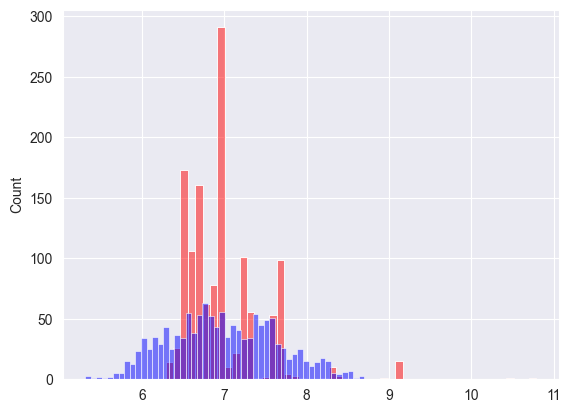

In [118]:
sns.histplot(y_pred_zero,color='red', alpha=0.5, bins=50)
sns.histplot(y_train,color='blue', alpha=0.5, bins=50)

<Axes: ylabel='Count'>

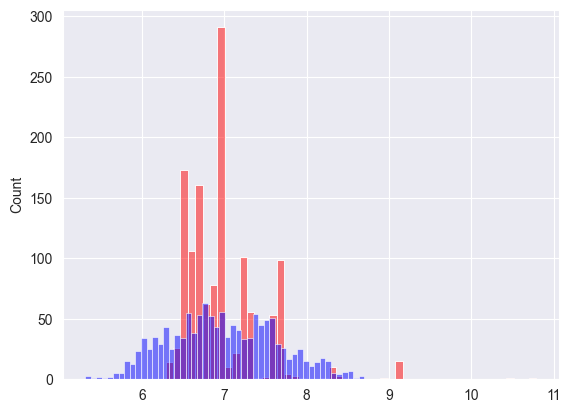

In [119]:
sns.histplot(y_pred_mean,color='red', alpha=0.5, bins=50)
sns.histplot(y_train,color='blue', alpha=0.5, bins=50)

In [120]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [121]:
rmse(y_train, y_pred_zero)

np.float64(0.44632651855038796)

In [122]:
rmse(y_train, y_pred_mean)

np.float64(0.44632651855038796)